# Hypothesis Testing

## Models versus Reality

In our examination of populations, we were introduced to *models* -- sets of assumptions about what a population distribution looks like. We assumed that the distribution of U.S. birthdays fit a uniform model ![](birthday-model.png), but when we took a sample it looked a bit different than uniform ![](birthday-sample.png). It doesn't look *too* different though, right? Or does it? At what point does that sample distribution look so different from our model population that we choose to abandon the model?

This teetering act between belief in a model versus the reality contained in a sample (albeit subject to random chance) is a tough but common problem present far beyond just statistics classes.

### Swain v. Alabama

The U.S. judicial system operates with a constitutional right that potential jurors for a court case are drawn representatively from the local population. We can think of the constitutional right as establishing a model that the jury pool is drawn randomly from the population of eligible jurors in the county.

Tragically, this model is often a fiction, as the 1965 case of Robert Swain vs. Alabama shows. As a Black man, Swain was convicted by an all-white jury and sentenced to death. Swain's conviction cannot be interpreted without considering the numerous instances in which the American criminal justice system has been deliberately and maliciously used as a weapon to inflict violence upon innocent Black Americans under legal pretenses. Swain's plight brings to mind the disturbing cases of the [Groveland Four](https://www.npr.org/2019/01/11/684540515/accused-of-florida-rape-70-years-ago-4-black-men-get-posthumous-pardons) and the [Scottsboro Boys](https://nmaahc.si.edu/blog/scottsboro-boys) in which Black men and boys were falsely accused and subsequently imprisoned, sentenced to death, or murdered.
In all three cases, defendents were tried by all-white juries.

Swain appealed his conviction by arguing that the all-white jury in his trial was chosen unconstitutionally.
Of the $100$ potential jurors pooled, only $8$ ($8\%$) were Black -- a sizable deviation from the $26\%$ of eligible Black jurors in the county. This case was soon elevated to the U.S. Supreme Court, Swain v. Alabama. The Supreme Court eventually denied the appeal and the claim of bias, concluding that the disparity between the demographics of the greater population and the jury was "small" and "reflects no studied attempt" to exclude Black people from the jury -- in other words, the court said the all-white jury was due to chance. This explanation might strike you as unlikely -- in fact, as the analyses of this section will show, the chance of seeing such a biased jury panel by pure chance is effectively zero.

Swain's appeal is an important example of the grave consequences that can result from an inability to reason about uncertainty. In the most optimistic view, the Supreme Court's decision came simply from ignorance of basic probability and statistics. In this light, had they even minimal training in reasoning about randomness, their decision would have been different and Swain's conviction would have been overturned. But in a less charitable  view, the Supreme Court knowingly upheld a racist system by using random chance as an excuse. In this sense, the court exploited the public's lack of experience in reasoning about uncertainty in order to perpetuate and legitimize a racist system. 

A populace armed with the ability to reason about uncertainty is not easily swayed by defenses of racism that attribute injustice to random chance. With that in mind, we now turn to the task of showing how the Supreme Court's decision can be refuted with a simple statistical argument.

## The guiding question

The general motivation for conducting a hypothesis is this:
- We have a {dterm}`model`, a set of assumptions which specify the shape of a population distribution
- We observed actual data in the form of a sample
- We're curious: *could what we observed have really come from the assumed population?*

If not, there could be some serious repercussions -- namely, there's a good chance our model is wrong! We would need to move to a new set of beliefs about how are samples are generated.

Otherwise, if it looks like our observation could have feasibly come from the assumed population, then we don't have enough evidence to abandon the model. We can continue operating under those beliefs (for now at least).

## Two competing hypotheses

In statistics, these two competing answers to our question give way to the formal definitions of the *null hypothesis* and *alternative hypothesis*:

- The {dterm}`null hypothesis`, denoted $H_0$, is the hypothesis that our model is true; our observations came from the assumed population.

    Under the belief of this hypothesis, even if our observation looks a bit strange and different than what we would expect from the model, this strangeness is *wholly do to random chance*.
    
- The {dterm}`alternative hypothesis`, denoted $H_1$, contradicts the null by stating that the model is false in some way; our observations came from a population that looks different than we assumed.

    This hypothesis stipulates that there is some reason *other than randomness* that lead to our observation being different than what we would expect from the model.

### Declaring our hypotheses

Let's declare our hypotheses for the Swain v. Alabama case.

Our model and likewise our **null hypothesis** assumes that the jury pool was drawn from a population of $26\%$ Black residents and $74\%$ non-black residents. We just happened to sample a low value like $8\%$ purely due to random chance.

Our **alternative hypothesis** is that the null is false, low values like $8\%$ were sampled because the jury pool was essentially drawn from a population less than $26\%$ Black.

**Note**

Though an alternative hypothesis can claim *how* a model is wrong -- for instance in this case we're claiming that the samples were taken from a population with a *lower* proportion of Black members than the model assumes -- we are not claiming specifically *why* this is the case.

While something like biased sampling could lead to the alternative hypothesis being more likely, something else like the county census reporting the wrong amount of Black residents could also be an underlying cause -- both of these might produce the same numerical differences between our model and sample.

## Simulating new observations

At the onset of our question, there's a lot of uncertainty about which hypothesis to believe in. Therefore, we turn to the powers of {dterm}`probabilities`! It seems really unlikely that a population that is $26\%$ Black could produce sample proportions that are really low, like $8\%$. But *how* unlikely?

We can use our simulation skills to help solve this question. By simply generating tons of random new observations using our null assumptions, we can see how likely it is for our model to produce strange samples like the one we observed.

Since we're generating these new sample statistics for the purpose of using them in a hypothesis test, they're called {dterm}`test statistics`. And, since we're operating under the population assumptions in order to create these samples, this entire process is called **generating test statistics *under the null***.

We start by using our model to define a population we can sample from. In this case, we can specify a probability distribution.

In [1]:
population = ['black', 'non-black']
population_probs = [0.26, 0.74]

Then we can generate a new sample from our assumed population by using NumPy. Remember that we'll specify `p=` to use our model probabilities. And for the sample size, we should make sure to **generate new samples with the same size as the original** -- in this case, $100$.

In [2]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt

jury_pool = np.random.choice(population, p=population_probs, size=100)

And the **test statistic** we're interested in is the proportion of Black members in the jury pool.

In [3]:
test_stat = (jury_pool == 'black').mean()
test_stat

0.25

Let's apply simulation best practices and put this code into a function to let ourselves easily call it multiple times in the future.

In [4]:
def simulate_jury_proportion():
    jury_pool = np.random.choice(population, p=population_probs, size=100)
    test_stat = (jury_pool == 'black').mean()
    return test_stat

Now, we can create a {dterm}`sampling distribution` of the test statistic under our null hypothesis -- in other words, if the model were true then what kind of observations would we expect to see?

This is done by simulating *lots* of observations under our null hypothesis, then plotting the distribution of the resulting test statistics. This follows the same process as our previous simulations. Namely, use a {dterm}`for loop` to generate simulated values multiple times, and add the result to a list each time. We can then use matplotlib to draw the histogram of these simulated values.

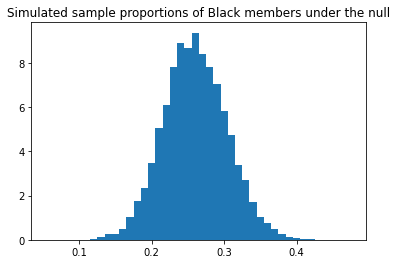

In [6]:
trials = 10_000
simulated_proportions = []

for i in range(trials):
    jury_proportion = simulate_jury_proportion()
    simulated_proportions.append(jury_proportion)

# These bins will look visually centered around each possible proportion
bins = np.arange(0.05, 0.48, 0.01)+0.005
plt.hist(simulated_proportions, bins=bins, density=True)
plt.title('Simulated sample proportions of Black members under the null');

Each proportion we simulated was the result of drawing $100$ people from a population that was $26\%$ Black. Naturally, lots of our simulated proportions were equal to $0.26$ -- but not exactly. This distribution shows us that our simulated proportions can range anywhere from about $0.1$ to $0.45$, but the distribution is *centered* around $0.26$.

## Could our observed value have come from the model?

What was our observed proportion again? Oh yeah, $0.08$. We've just simulated 10,000 samples under the assumptions of our model. Let's see how those compare to what we originally observed.

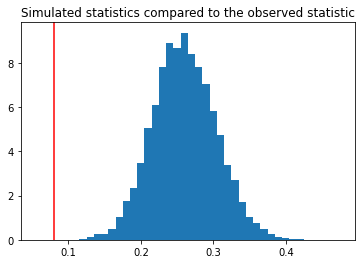

In [7]:
observed = 0.08
plt.hist(simulated_proportions, bins=bins, density=True)
# Draw a red vertical line at our originally observed value
plt.axvline(observed, c='r')
plt.title('Simulated statistics compared to the observed statistic');

Our original observation is off-the-charts low... literally!

Remember that our alternative hypothesis is that the jury pool was truly sampled with less than a $26\%$ Black population -- in other words, the alternative hypothesis supposes that the true sampling distribution should be shifted left, centered around something lower than $0.26$.

We started off by wanting to quantify how likely it is that such a 'strange' observation could have come from our model. Since our alternative hypothesis stipulates that low values are considered strange, we can calculate the probably of simulating a value as strange (or stranger) than the one we observed as:

$$
P(\text{simulated values} \leq \text{observed value})
$$

We could also calculate this by adding up the areas of each bar on the histogram that is more extreme than our observed value.

In [8]:
(np.array(simulated_proportions) <= 0.08).mean()

0.0

Turns out Swain had a good reason to feel uneasy about the numbers he saw. It is *extremely rare* for a population that is $26\%$ Black to produce a sample of $100$ people that happens to be only $8\%$ Black.

It is not impossible (and our empirical simulation is just computing *estimate* probabilities, remember?), but our empirical probability of our observation arising from the null assumptions is so rare that we're going to 'reject' those assumptions. The jury pool for Swain's case clearly did *not* look like it came directly from a random sample of a $26\%$ black population.

### A two-sided alternative

Truly, if we were the U.S. Department of Justice and wanted to check for bias in the jury pooling process, we would be interested in checking for *any* bias in *either* direction -- that is, our **alternative hypothesis** would be that the proportion of Black members in population the jury pool is selected from is either greater or less than $26\%$. This produces a two-sided alternative hypothesis.

$$
H_1: P(\text{black}) \neq 0.26
$$

In this case, we're less concerned about whether the observed metric was specifically lower or higher than what the model assumes, and are more concerned about *how far away* the metric is. How do we do that? By taking the absolute value! In both our code and notationally we can re-write our alternative hypothesis as

$$
H_1: |P(\text{black}) - 0.26| > 0
$$

Let's re-examine the Swain case with the alternative hypothesis which is attempting to detect bias in either direction. We don't actually need to run any new simulations, we just need to check the absolute difference when computing the probability that such an extreme observation could be produced under the null hypothesis.

In [ ]:
# How many simulated proportions were as far or further away from the null
# assumed proportion (0.26) than what we originally observed (0.08)?
original = np.abs(0.08 - 0.26)
(np.abs(np.array(simulated_proportions) - 0.26) >= original).mean()

You'll notice that our probability of simulating 'extreme' results with a two-sided alternative is always larger than the probability of a one-sided alternative. That's because, simply put, more values are considered extreme!

## The p-value

Once again, we give way to the formal language of statistics. The probability we estimated has a name: the {dterm}`p-value`.

It is mathematically defined as the probability that a metric generated under the null hypothesis can be as extreme or more extreme than the observed metric. Visually, the p-value is just the area of the sampling distribution that is more extreme than our observed value.

![](shaded-p-value.png)

Remember that the 'extremity' of a value is based on our alternative hypothesis. If $H_1$ proposes that some parameter is truly less than our model assumes, then lower statistics are more extreme. The opposite is true if the alternative proposes the true value of a parameter is greater than in our model. And if the alternative is two-sided then we only care about the distance between a statistic and the assumed parameter.

## Making judgments with the p-value

Once we've found the p-value -- the chance our null population could have produced a sample statistics as extreme as the one we originally observed -- it's time to get judgmental.

Are those null assumptions still holding up? Depends on how big our p-value is, and how much uncertainty we're willing to accept in our lives.

- **If the p-value is really small** it suggests that it's really unlikely for the assumed population to produce such extreme sample statistics -- not impossible, just so rare that we think there are flaws with our assumptions.

    When what we observed would be super unlikely if the null were true, we make the judgment to **"reject the null"** in favor of the beliefs set forth by the alternative hypothesis.

- **If the p-value isn't so small** then it's still conceivable that random chance could have been the sole reason for observing a sample statistic different from the population parameter -- after all, we did observe it $p\%$ of the time!

    Because our test doesn't seem to suggest anything wrong with our observed statistic meshing with the beliefs set forth by the null, we don't have justification to change those beliefs, and we **"fail to reject** the null".

```{admonition} A look forward
Even if we reject the null in favor of the alternative, we don't yet have a solid guess for what population we think our original sample truly came from! All that the alternative says is that the underlying population parameter is less-than/greater-than/not-equal-to a value, but shouldn't we take a next step and estimate what value it actually is?

We'll learn to do exactly this in the chapter on Estimation.
```

So, we abandon the null hypothesis if the p-value is really small, and don't if the p-value isn't really small.

But how small *is* 'really small'?

## The threshold for $p$

The cutoff for when a p-value is considered small enough to reject the null should be set ahead of time -- before the test is conducted. This threshold is generally referred to as the {dterm}`level of significance`, denoted $\alpha$, and its value should be chosen depending on conventions, tolerance of risk (what if your test is wrong!?), and even your personal belief about how random the universe is.

When you set the level of significance, you're essentially saying:  
"*If my observed statistic had less than $\alpha\%$ chance of coming from the null-assumed population, then I'll reject the null.*"

In the history of hypothesis testing setting this value has been somewhat of a touchy-subject, and has sparked great controversy! If you've ever seen a hypothesis test before this point, you've likely seen the phrase "$p < \alpha = 0.05$" as the justification that the results of some paper are significant since they were able to quash the prior beliefs of the null. Why is $0.05$ used so commonly, though? Simply because it is popular.

Remember, if we set $\alpha=0.05$ then we'll choose abandon an entire set of beliefs just because we observed something that had a less-than $5\%$ chance of occurring. What if the null is actually true, though? Then $5\%$ of the time that we run our test we might randomly make an observation worth of incorrectly rejecting the null -- that's could be a one-in-twenty event!

The level of significance is directly linked with the chance that we incorrectly reject the null hypothesis when in fact it is true. A "false positive" such as this could lead to disastrous effects depending on your field, which is why many fields like medicine choose much more stringent levels of significance, like $\alpha=0.001$.

## Applying the framework to diverse scenarios

The hypothesis testing framework work we've discovered really works great on lots of different things you throw at it.

To summarize this framework, we:
1. Observe a sample and statistic
2. Formulate a null hypothesis about the underlying population and parameter, and set a level of significance
3. Formulate an alternative hypothesis
4. Generate new test statistics under the assumptions of the null
5. Calculate the probability of a test statistic being as extreme as the observed statistic
6. Make a judgment about the null hypothesis using the p-value and level of significance

Notice that this approach towards hypothesis testing handles many different things we throw at it. We can run tests on continuous data or discrete data and it doesn't matter what the true population looks like just as long as we're able to generate a statistic. We can test using practically *any* statistic we choose, such as a mean, max, variance, or even count.

This framework is so incredibly flexible because it follows a simple, intuitive principle: *if we have a set of assumptions, then we better expect data generated from those assumptions to look like what we observed in real life.* We now have a solid way to quantify the degree to which an observation challenges a set of assumptions.

## Follow-up questions

### Why we don't calculate probability of equaling the observed value?

- When there are lots of possible outcomes, the probability of any *one specific outcome* is assuredly low!
- When working with continuous data, the probability of observing or generating any single number is (mathematically) zero
- Besides, if you were to see a result *more* extreme than the observed statistic, surely it should also count as evidence against the null, right?

### What if I reject the null but it's actually true?

- This does happen! It's called a "false positive" or "Type I Error" (type one)
- We know the probably of incorrectly rejecting the null -- it's $\alpha$, our level of significance!